In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib
from astropy.table import Table, hstack, join
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
from scipy import stats
from scipy import interpolate
import glob
import os
import re
import sys
import math
import time
import functools 
import psutil
import seaborn as sns
import pandas as pd
from itertools import groupby
from collections import Counter
import bz2
import tqdm
import gc
#import proplot as plot

In [3]:
# when running this cell you should give access to google to the files that are in the drive copying and pasting a code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
WORKDIR = '/content/drive/Shared drives/Portsmouth-Bologna/'
os.chdir(WORKDIR)

In [17]:
observable_df = pd.read_csv('observable_full.csv')
observable_df

,For_key_ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,z,t/Gyr,M*,M_initial,Z,SFH,tau/Gyr,Av_law,Av,t_l,physical
0,11778,24.4559,21.2513,18.8165,17.1871,16.1598,17.3743,14.8193,13.8647,13.1298,0.01,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.142799,True
1,11779,26.0896,22.8653,20.4177,18.7772,17.7395,18.9609,16.3787,15.4099,14.6630,0.02,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.283535,True
2,11780,27.0969,23.8540,21.3933,19.7427,18.6937,19.9219,17.3139,16.3305,15.5716,0.03,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.422245,True
3,11781,27.8444,24.5863,22.1115,20.4527,19.3919,20.6274,17.9932,16.9954,16.2240,0.04,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.558968,True
4,11782,28.4497,25.1780,22.6875,21.0227,19.9497,21.1922,18.5324,17.5203,16.7361,0.05,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.693734,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299775,1012817,19.4627,17.5401,16.2592,15.4677,14.9378,15.6757,14.2977,13.7890,13.3400,0.01,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.142799,True
299776,1012818,21.0540,19.1060,17.8141,17.0149,16.4871,17.2263,15.8320,15.3213,14.8597,0.02,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.283535,True
299777,1012819,22.0174,20.0473,18.7439,17.9375,17.4130,18.1522,16.7421,16.2287,15.7571,0.03,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.422245,True
299778,1012820,22.7193,20.7326,19.4171,18.6058,18.0817,18.8222,17.3960,16.8793,16.3961,0.04,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.558968,True


In [18]:
limiting_mags = {
    'LSST_u': 24.2,
    'LSST_g': 24.5,
    'LSST_r': 23.9,
    'LSST_i': 23.6,
    'LSST_z': 23.4,
    'VIS': 24.5,
    'NISP_Y': 23.0,
    'NISP_J': 23.0,
    'NISP_H': 23.0
}

In [19]:
#condmax = (observable_df['NISP_Y'] < limiting_mags['NISP_Y'])
#        & (observable_df['NISP_J'] < limiting_mags['NISP_J'])
#        & (observable_df['NISP_H'] < limiting_mags['NISP_H'])
#        & (observable_df['LSST_u'] < limiting_mags['LSST_u'])
#        & (observable_df['LSST_g'] < limiting_mags['LSST_g'])
#        & (observable_df['LSST_r'] < limiting_mags['LSST_r'])
#        & (observable_df['LSST_i'] < limiting_mags['LSST_i'])
#        & (observable_df['LSST_z'] < limiting_mags['LSST_z'])
#        & (observable_df['VIS'] < limiting_mags['VIS'])
condmax = (observable_df['VIS'] < limiting_mags['VIS'])
observable_df = observable_df[condmax]

In [20]:
#condmin = (observable_df['NISP_Y'] > 15)
#        & (observable_df['NISP_J'] > 15)
#        & (observable_df['NISP_H'] > 15)
#        & (observable_df['LSST_u'] > 15)
#        & (observable_df['LSST_g'] > 15)
#        & (observable_df['LSST_r'] > 15)
#        & (observable_df['LSST_i'] > 15)
#        & (observable_df['LSST_z'] > 15)
#        & (observable_df['VIS'] > 15)
condmin = (observable_df['VIS'] > 15)
observable_df = observable_df[condmin]

In [21]:
observable_df

,For_key_ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,z,t/Gyr,M*,M_initial,Z,SFH,tau/Gyr,Av_law,Av,t_l,physical
0,11778,24.4559,21.2513,18.8165,17.1871,16.1598,17.3743,14.8193,13.8647,13.1298,0.01,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.142799,True
1,11779,26.0896,22.8653,20.4177,18.7772,17.7395,18.9609,16.3787,15.4099,14.6630,0.02,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.283535,True
2,11780,27.0969,23.8540,21.3933,19.7427,18.6937,19.9219,17.3139,16.3305,15.5716,0.03,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.422245,True
3,11781,27.8444,24.5863,22.1115,20.4527,19.3919,20.6274,17.9932,16.9954,16.2240,0.04,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.558968,True
4,11782,28.4497,25.1780,22.6875,21.0227,19.9497,21.1922,18.5324,17.5203,16.7361,0.05,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.693734,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299775,1012817,19.4627,17.5401,16.2592,15.4677,14.9378,15.6757,14.2977,13.7890,13.3400,0.01,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.142799,True
299776,1012818,21.0540,19.1060,17.8141,17.0149,16.4871,17.2263,15.8320,15.3213,14.8597,0.02,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.283535,True
299777,1012819,22.0174,20.0473,18.7439,17.9375,17.4130,18.1522,16.7421,16.2287,15.7571,0.03,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.422245,True
299778,1012820,22.7193,20.7326,19.4171,18.6058,18.0817,18.8222,17.3960,16.8793,16.3961,0.04,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.558968,True


<Figure size 432x288 with 0 Axes>

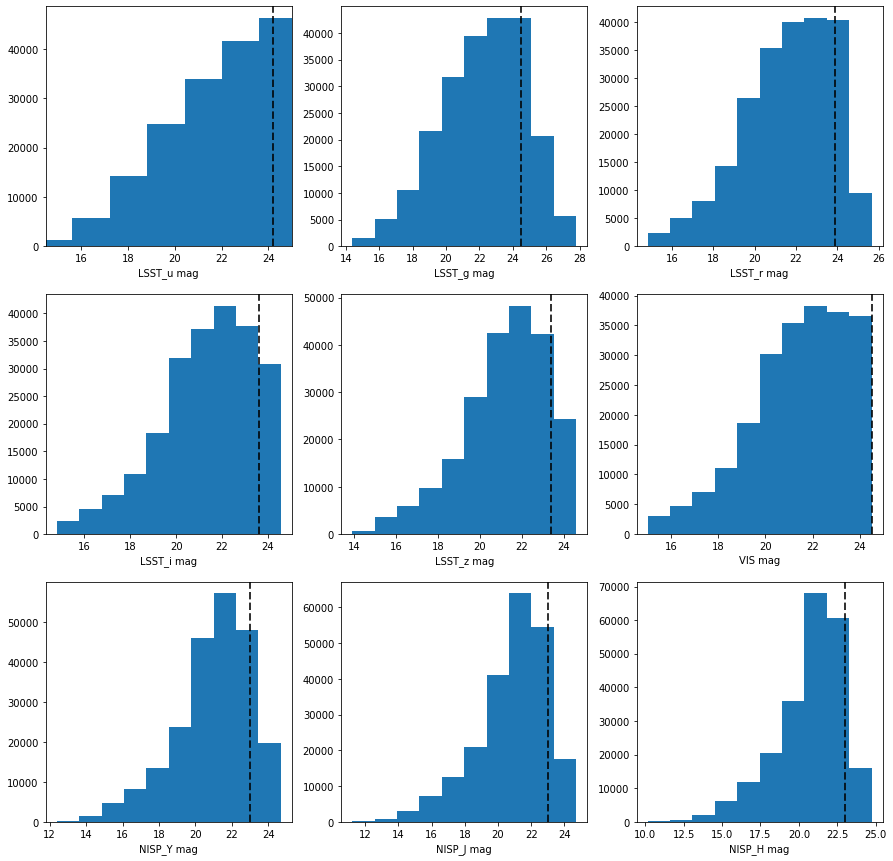

In [22]:
plt.clf()
plt.figure(figsize=(15,15))
plt.subplot(331)
plt.hist(observable_df['LSST_u'])
plt.xlabel('LSST_u mag')
plt.axvline(x=limiting_mags.get('LSST_u'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlim([14.5, 25])

plt.subplot(332)
plt.hist(observable_df['LSST_g'])
plt.axvline(x=limiting_mags.get('LSST_g'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('LSST_g mag')

plt.subplot(333)
plt.hist(observable_df['LSST_r'])
plt.axvline(x=limiting_mags.get('LSST_r'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('LSST_r mag')

plt.subplot(334)
plt.hist(observable_df['LSST_i'])
plt.axvline(x=limiting_mags.get('LSST_i'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('LSST_i mag')

plt.subplot(335)
plt.hist(observable_df['LSST_z'])
plt.axvline(x=limiting_mags.get('LSST_z'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('LSST_z mag')

plt.subplot(336)
plt.hist(observable_df['VIS'])
plt.axvline(x=limiting_mags.get('VIS'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('VIS mag')

plt.subplot(337)
plt.hist(observable_df['NISP_Y'])
plt.axvline(x=limiting_mags.get('NISP_Y'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('NISP_Y mag')

plt.subplot(338)
plt.hist(observable_df['NISP_J'])
plt.axvline(x=limiting_mags.get('NISP_J'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('NISP_J mag')

plt.subplot(339)
plt.hist(observable_df['NISP_H'])
plt.axvline(x=limiting_mags.get('NISP_H'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('NISP_H mag')

plt.show()
#plt.savefig('mags_hist.png', format='png', dpi=250)

## Applying photometric errors (but hopefully correctly this time)

We should reach a S/N = 10 as a limit. Signal and noise are referred to in fluxes, however, so I'll have to convert the magnitudes into fluxes. But this is beneficial! Here's how Micol explained it:

This is also useful because in reality the Gaussian distribution of errors is expected on fluxes, not on their logarithm. So, you will have $f_{lim}$ derived from $m_{lim}$, and you know that $f_{lim}/\Delta f = 10$, from which you obtain $\Delta f$. This is the number you can use as sigma for your Gaussian distribution of noise to be applied on fluxes. So, if `f` is the flux you have from the model SEDs, you obtain `fobs=f+np.random.normal(0,Δf)`. Then you have to convert back fluxes and errors in magnitudes.


## Converting from Magnitudes to Flux ($\mu$Jy)

$$m_{AB} = -2.5 \log_{10}f + 23.9$$

$$f = 10^{-0.4(m_{AB} -23.9)}$$



$$\frac{f}{\Delta f} = 10$$ 
$$\Delta f_{lim} = \frac{f_{lim}}{10} = S/N$$

$$f_{obs} = f + \frac{1}{\Delta f \sqrt{2 \pi}} exp \frac{f^2}{2 \Delta f^2}$$

$$m_{obs} = -2.5 \log_{10}f_{obs} + 23.9$$

$$\Delta m = \frac{2.5}{\ln(10) \frac{\Delta f }{f}} $$

In [23]:
def AB_to_flux(AB):
    f=np.ones(len(AB))
    f = pow(10.0, -0.4*(np.asarray(AB) - 23.9))
    return f

In [151]:
def flux_to_AB(flux):
    #m=np.ones(len(flux))*99.0
    #i=np.where(flux>0.0) 
    #m[i]=-2.5*np.log10(flux[i])+23.9
    m=-2.5*np.log10(flux)+23.9
    np.nan_to_num(m,copy=False,nan=99.0,posinf=None,neginf=None)
    return m

In [25]:
limiting_fluxes = limiting_mags.copy()

In [26]:
for i in limiting_fluxes.keys():
    limiting_fluxes[i] = 10**(-0.4*(limiting_mags[i] - 23.9))

In [27]:
limiting_fluxes

{'LSST_g': 0.5754399373371561,
 'LSST_i': 1.3182567385564037,
 'LSST_r': 1.0,
 'LSST_u': 0.7585775750291832,
 'LSST_z': 1.5848931924611136,
 'NISP_H': 2.29086765276777,
 'NISP_J': 2.29086765276777,
 'NISP_Y': 2.29086765276777,
 'VIS': 0.5754399373371561}

In [28]:
lim_flux_err = limiting_fluxes.copy()

In [29]:
SN = 10

In [30]:
for i in lim_flux_err.keys():
    lim_flux_err[i] = lim_flux_err[i]/SN

In [31]:
lim_flux_err

{'LSST_g': 0.05754399373371562,
 'LSST_i': 0.13182567385564037,
 'LSST_r': 0.1,
 'LSST_u': 0.07585775750291832,
 'LSST_z': 0.15848931924611137,
 'NISP_H': 0.22908676527677702,
 'NISP_J': 0.22908676527677702,
 'NISP_Y': 0.22908676527677702,
 'VIS': 0.05754399373371562}

In [32]:
lim_mag_err = lim_flux_err.copy()
for i in lim_flux_err.keys():
    lim_mag_err[i] = (2.5/np.log(10.))*np.abs(lim_flux_err[i]/limiting_fluxes[i])

In [33]:
lim_mag_err

{'LSST_g': 0.10857362047581294,
 'LSST_i': 0.10857362047581294,
 'LSST_r': 0.10857362047581294,
 'LSST_u': 0.10857362047581293,
 'LSST_z': 0.10857362047581294,
 'NISP_H': 0.10857362047581294,
 'NISP_J': 0.10857362047581294,
 'NISP_Y': 0.10857362047581294,
 'VIS': 0.10857362047581294}

In [188]:
phot_errors_df = observable_df.copy()

In [189]:
np.random.seed(seed = 45)

In [190]:
def addFluxColumns(table):
    row_number = table["VIS"].size
    for name in lim_flux_err.keys():
        col_data = AB_to_flux(table[name])
        col_name = 'FLUX_'+name
        table[col_name]=col_data
    return table

In [191]:
def addErrorColumns(table):
    row_number = table["VIS"].size
    for name in lim_flux_err.keys():
        col_data = np.ones(row_number)*lim_flux_err.get(name)
        col_name = 'FLUX_'+name+'_ERR'
        table[col_name]=col_data
    return table

In [192]:
def randomizeFlux(table):
    row_number = table['VIS'].size
    for name in lim_flux_err.keys():
        s = np.random.normal(0,table['FLUX_'+name+'_ERR'],row_number)
        table['FLUX_'+name+'_OBS']=table['FLUX_'+name]+s
    return table

In [193]:
def addObsMagnitudes(table):
  for name in lim_flux_err.keys():
    flux_obs=table['FLUX_'+name+'_OBS']
    mag_obs = flux_to_AB(flux_obs)
    dmag = (2.5/np.log(10.))*np.abs(table['FLUX_'+name+'_ERR']/table['FLUX_'+name])
    table[name+'_OBS'] = mag_obs
    table['delta_'+ name] = dmag
    table['delta_'+ name][table[name]>90.] = 99.
  return table

In [194]:
table_with_flux = addFluxColumns(phot_errors_df)
table_with_error = addErrorColumns(phot_errors_df)
del phot_errors_df
randomized_table = randomizeFlux(table_with_error)
del table_with_error
phot_errors_df = addObsMagnitudes(randomized_table)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726

In [195]:
observable_df

,For_key_ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,z,t/Gyr,M*,M_initial,Z,SFH,tau/Gyr,Av_law,Av,t_l,physical
0,11778,24.4559,21.2513,18.8165,17.1871,16.1598,17.3743,14.8193,13.8647,13.1298,0.01,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.142799,True
1,11779,26.0896,22.8653,20.4177,18.7772,17.7395,18.9609,16.3787,15.4099,14.6630,0.02,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.283535,True
2,11780,27.0969,23.8540,21.3933,19.7427,18.6937,19.9219,17.3139,16.3305,15.5716,0.03,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.422245,True
3,11781,27.8444,24.5863,22.1115,20.4527,19.3919,20.6274,17.9932,16.9954,16.2240,0.04,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.558968,True
4,11782,28.4497,25.1780,22.6875,21.0227,19.9497,21.1922,18.5324,17.5203,16.7361,0.05,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.693734,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299775,1012817,19.4627,17.5401,16.2592,15.4677,14.9378,15.6757,14.2977,13.7890,13.3400,0.01,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.142799,True
299776,1012818,21.0540,19.1060,17.8141,17.0149,16.4871,17.2263,15.8320,15.3213,14.8597,0.02,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.283535,True
299777,1012819,22.0174,20.0473,18.7439,17.9375,17.4130,18.1522,16.7421,16.2287,15.7571,0.03,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.422245,True
299778,1012820,22.7193,20.7326,19.4171,18.6058,18.0817,18.8222,17.3960,16.8793,16.3961,0.04,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.558968,True


In [196]:
phot_errors_df

,For_key_ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,z,t/Gyr,M*,M_initial,Z,SFH,tau/Gyr,Av_law,Av,t_l,physical,FLUX_LSST_u,FLUX_LSST_g,FLUX_LSST_r,FLUX_LSST_i,FLUX_LSST_z,FLUX_VIS,FLUX_NISP_Y,FLUX_NISP_J,FLUX_NISP_H,FLUX_LSST_u_ERR,FLUX_LSST_g_ERR,FLUX_LSST_r_ERR,FLUX_LSST_i_ERR,FLUX_LSST_z_ERR,FLUX_VIS_ERR,FLUX_NISP_Y_ERR,FLUX_NISP_J_ERR,FLUX_NISP_H_ERR,FLUX_LSST_u_OBS,FLUX_LSST_g_OBS,FLUX_LSST_r_OBS,FLUX_LSST_i_OBS,FLUX_LSST_z_OBS,FLUX_VIS_OBS,FLUX_NISP_Y_OBS,FLUX_NISP_J_OBS,FLUX_NISP_H_OBS,LSST_u_OBS,delta_LSST_u,LSST_g_OBS,delta_LSST_g,LSST_r_OBS,delta_LSST_r,LSST_i_OBS,delta_LSST_i,LSST_z_OBS,delta_LSST_z,VIS_OBS,delta_VIS,NISP_Y_OBS,delta_NISP_Y,NISP_J_OBS,delta_NISP_J,NISP_H_OBS,delta_NISP_H
0,11778,24.4559,21.2513,18.8165,17.1871,16.1598,17.3743,14.8193,13.8647,13.1298,0.01,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.142799,True,0.599294,11.467797,107.994093,484.350776,1247.613312,407.643010,4288.249049,10330.468077,20327.314194,0.075858,0.057544,0.1,0.131826,0.158489,0.057544,0.229087,0.229087,0.229087,0.601295,11.421723,107.905706,484.064982,1247.511936,407.586137,4288.090430,10330.392730,20327.023072,24.452281,0.137431,21.255671,0.005448,18.817389,0.001005,17.187741,0.000296,16.159888,0.000138,17.374451,0.000153,14.819340,0.000058,13.864708,0.000024,13.129816,0.000012
1,11779,26.0896,22.8653,20.4177,18.7772,17.7395,18.9609,16.3787,15.4099,14.6630,0.02,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.283535,True,0.133094,2.593463,24.712689,111.974724,291.205786,94.545312,1019.811723,2489.086561,4952.220801,0.075858,0.057544,0.1,0.131826,0.158489,0.057544,0.229087,0.229087,0.229087,0.152842,2.631391,24.611976,111.868358,291.329657,94.536657,1019.839095,2488.888503,4952.102619,25.939394,0.618820,22.849536,0.024090,20.422134,0.004393,18.778232,0.001278,17.739038,0.000591,18.960999,0.000661,16.378671,0.000244,15.409986,0.000100,14.663026,0.000050
2,11780,27.0969,23.8540,21.3933,19.7427,18.6937,19.9219,17.3139,16.3305,15.5716,0.03,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.422245,True,0.052631,1.043278,10.061900,46.017180,120.926087,39.015754,430.963014,1066.105049,2144.667645,0.075858,0.057544,0.1,0.131826,0.158489,0.057544,0.229087,0.229087,0.229087,0.022656,1.030523,9.960990,46.038193,120.855775,39.011387,430.708782,1066.044904,2145.111218,28.012044,1.564892,23.867355,0.059886,21.404244,0.010791,19.742204,0.003110,18.694331,0.001423,19.922022,0.001601,17.314541,0.000577,16.330561,0.000233,15.571375,0.000116
3,11781,27.8444,24.5863,22.1115,20.4527,19.3919,20.6274,17.9932,16.9954,16.2240,0.04,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.558968,True,0.026439,0.531472,5.192781,23.928749,63.568213,20.372297,230.526045,577.883108,1175.980174,0.075858,0.057544,0.1,0.131826,0.158489,0.057544,0.229087,0.229087,0.229087,0.010941,0.439821,5.149616,23.897417,63.692958,20.322372,229.935387,578.018274,1176.566636,28.802369,3.115188,24.791811,0.117556,22.120563,0.020909,20.454123,0.005981,19.389771,0.002707,20.630064,0.003067,17.995985,0.001079,16.995146,0.000430,16.223459,0.000212
4,11782,28.4497,25.1780,22.6875,21.0227,19.9497,21.1922,18.5324,17.5203,16.7361,0.05,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.693734,True,0.015140,0.308177,3.054921,14.155330,38.029446,12.109327,140.294291,356.352656,733.770081,0.075858,0.057544,0.1,0.131826,0.158489,0.057544,0.229087,0.229087,0.229087,-0.081323,0.286654,3.100176,14.086479,37.720086,12.102175,140.190260,356.538341,733.820586,99.000000,5.440068,25.256605,0.202733,22.671534,0.035541,21.027994,0.010111,19.958568,0.004525,21.192841,0.005159,18.533205,0.001773,17.519734,0.000698,16.736025,0.000339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299775,1012817,19.4627,17.5401,16.2592,15.4677,14.9378,15.6757,14.2977,13.7890,13.3400,0.01,13.000,

In [184]:
# -----------

In [185]:
# old cell
#for name in lim_flux_err.keys():
#    mag = phot_errors_df[name]
#    flux = AB_to_flux(mag)
#    noise = np.random.normal(0, lim_flux_err[name])
#    flux_obs = flux + noise
#    flux_err = lim_flux_err[name]
#    mag_obs = flux_to_AB(flux_obs)
#    dmag = (2.5/np.log(10.))*np.abs(flux_err/flux)
#    phot_errors_df[name] = mag_obs
#    phot_errors_df['delta_'+ name] = dmag

## Errors visualised

<Figure size 432x288 with 0 Axes>

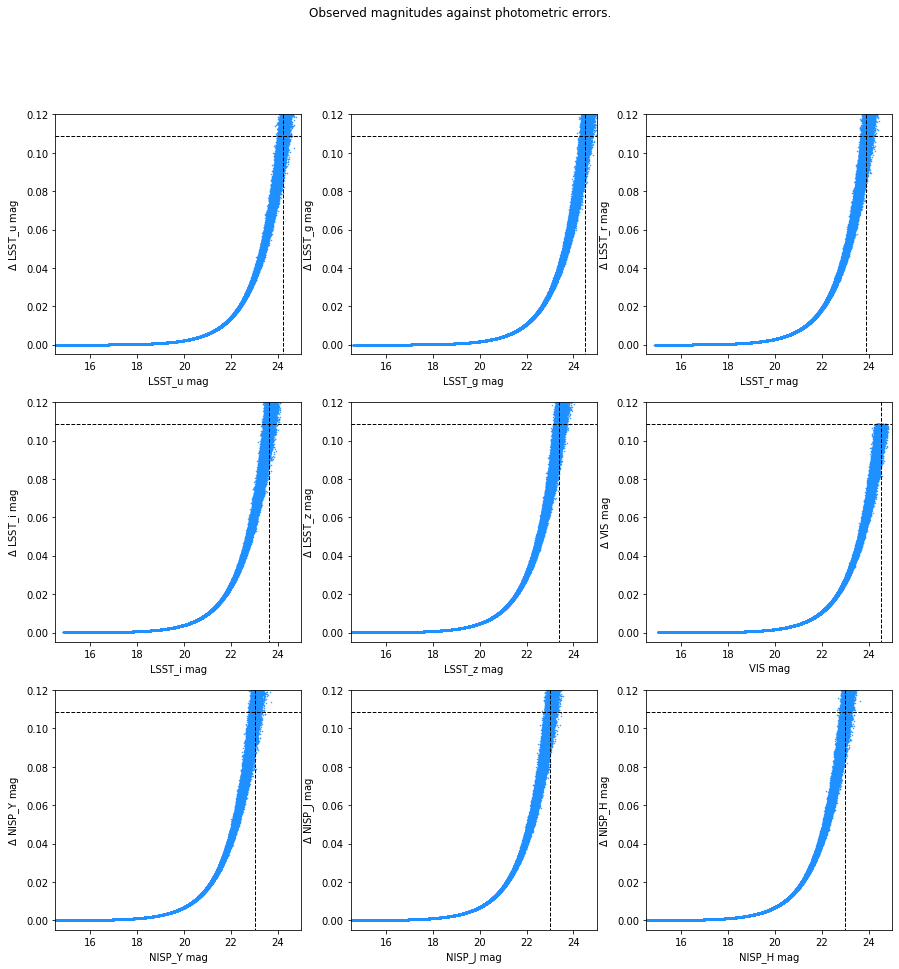

In [198]:
plt.clf()
plt.figure(figsize=(15,15))
plt.suptitle('Observed magnitudes against photometric errors.')
plt.subplot(331)
plt.scatter(phot_errors_df['LSST_u_OBS'], phot_errors_df['delta_LSST_u'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_u'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
#plt.xlim([23.5, 25])
#plt.ylim([0.05, 0.12])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_u mag')
plt.ylabel(r'$\Delta$ LSST_u mag')

plt.subplot(332)
plt.scatter(phot_errors_df['LSST_g_OBS'], phot_errors_df['delta_LSST_g'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_g'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_g mag')
plt.ylabel(r'$\Delta$ LSST_g mag')

plt.subplot(333)
plt.scatter(phot_errors_df['LSST_r_OBS'], phot_errors_df['delta_LSST_r'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_r'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_r mag')
plt.ylabel(r'$\Delta$ LSST_r mag')

plt.subplot(334)
plt.scatter(phot_errors_df['LSST_i_OBS'], phot_errors_df['delta_LSST_i'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_i'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_i mag')
plt.ylabel(r'$\Delta$ LSST_i mag')

plt.subplot(335)
plt.scatter(phot_errors_df['LSST_z_OBS'], phot_errors_df['delta_LSST_z'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_z'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_z mag')
plt.ylabel(r'$\Delta$ LSST_z mag')

plt.subplot(336)
plt.scatter(phot_errors_df['VIS_OBS'], phot_errors_df['delta_VIS'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['VIS'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('VIS mag')
plt.ylabel(r'$\Delta$ VIS mag')

plt.subplot(337)
plt.scatter(phot_errors_df['NISP_Y_OBS'], phot_errors_df['delta_NISP_Y'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_Y'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_Y mag')
plt.ylabel(r'$\Delta$ NISP_Y mag')

plt.subplot(338)
plt.scatter(phot_errors_df['NISP_J_OBS'], phot_errors_df['delta_NISP_J'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_J'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_J mag')
plt.ylabel(r'$\Delta$ NISP_J mag')

plt.subplot(339)
plt.scatter(phot_errors_df['NISP_H_OBS'], phot_errors_df['delta_NISP_H'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_H'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_H mag')
plt.ylabel(r'$\Delta$ NISP_H mag')
plt.show()
#plt.savefig('observed_mags_v_delmags.png', format='png', dpi=250, facecolor='w')

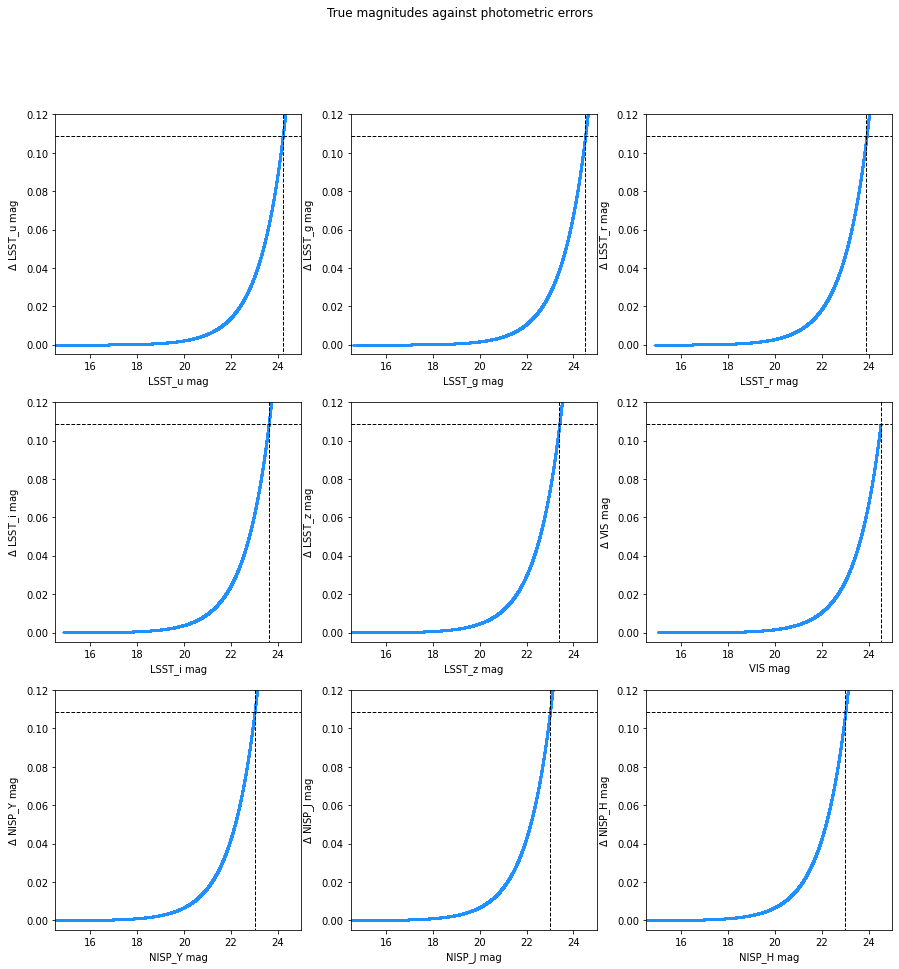

In [199]:
plt.figure(figsize=(15,15))
plt.suptitle('True magnitudes against photometric errors')
plt.subplot(331)
plt.scatter(observable_df['LSST_u'], phot_errors_df['delta_LSST_u'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_u'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_u mag')
plt.ylabel(r'$\Delta$ LSST_u mag')

plt.subplot(332)
plt.scatter(observable_df['LSST_g'], phot_errors_df['delta_LSST_g'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_g'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_g mag')
plt.ylabel(r'$\Delta$ LSST_g mag')

plt.subplot(333)
plt.scatter(observable_df['LSST_r'], phot_errors_df['delta_LSST_r'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_r'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_r mag')
plt.ylabel(r'$\Delta$ LSST_r mag')

plt.subplot(334)
plt.scatter(observable_df['LSST_i'], phot_errors_df['delta_LSST_i'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_i'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_i mag')
plt.ylabel(r'$\Delta$ LSST_i mag')

plt.subplot(335)
plt.scatter(observable_df['LSST_z'], phot_errors_df['delta_LSST_z'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_z'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_z mag')
plt.ylabel(r'$\Delta$ LSST_z mag')

plt.subplot(336)
plt.scatter(observable_df['VIS'], phot_errors_df['delta_VIS'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['VIS'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('VIS mag')
plt.ylabel(r'$\Delta$ VIS mag')

plt.subplot(337)
plt.scatter(observable_df['NISP_Y'], phot_errors_df['delta_NISP_Y'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_Y'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_Y mag')
plt.ylabel(r'$\Delta$ NISP_Y mag')

plt.subplot(338)
plt.scatter(observable_df['NISP_J'], phot_errors_df['delta_NISP_J'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_J'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_J mag')
plt.ylabel(r'$\Delta$ NISP_J mag')

plt.subplot(339)
plt.scatter(observable_df['NISP_H'], phot_errors_df['delta_NISP_H'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_H'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_H mag')
plt.ylabel(r'$\Delta$ NISP_H mag')

plt.show()
#plt.savefig('phot_errs_revised.png', format='png', dpi=250, facecolor='w')

In [ ]:
ughhhh = observable_df['tau/Gyr'].value_counts()
ughhhh

1.0     35814
0.1     34004
3.0     32294
10.0    27246
Name: tau/Gyr, dtype: int64

In [ ]:
taus = {'0.1 Gyr':ughhhh[0.1],
        '1 Gyr':ughhhh[1],
        '3 Gyr':ughhhh[3],
        '10 Gyr':ughhhh[10]}

In [ ]:
tau_names=list(taus.keys())
tau_counts=list(taus.values())

In [ ]:
zeds = observable_df['Z'].value_counts()
zeds

-0.3    51267
 0.3    46776
 0.0    31315
Name: Z, dtype: int64

In [ ]:
Z_dict = {'-0.3' : zeds[-0.3],
          '0.0' : zeds[0.0],
          '0.3' : zeds[0.3]}

In [ ]:
Z_names = list(Z_dict.keys())
Z_counts = list(Z_dict.values())

/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class w

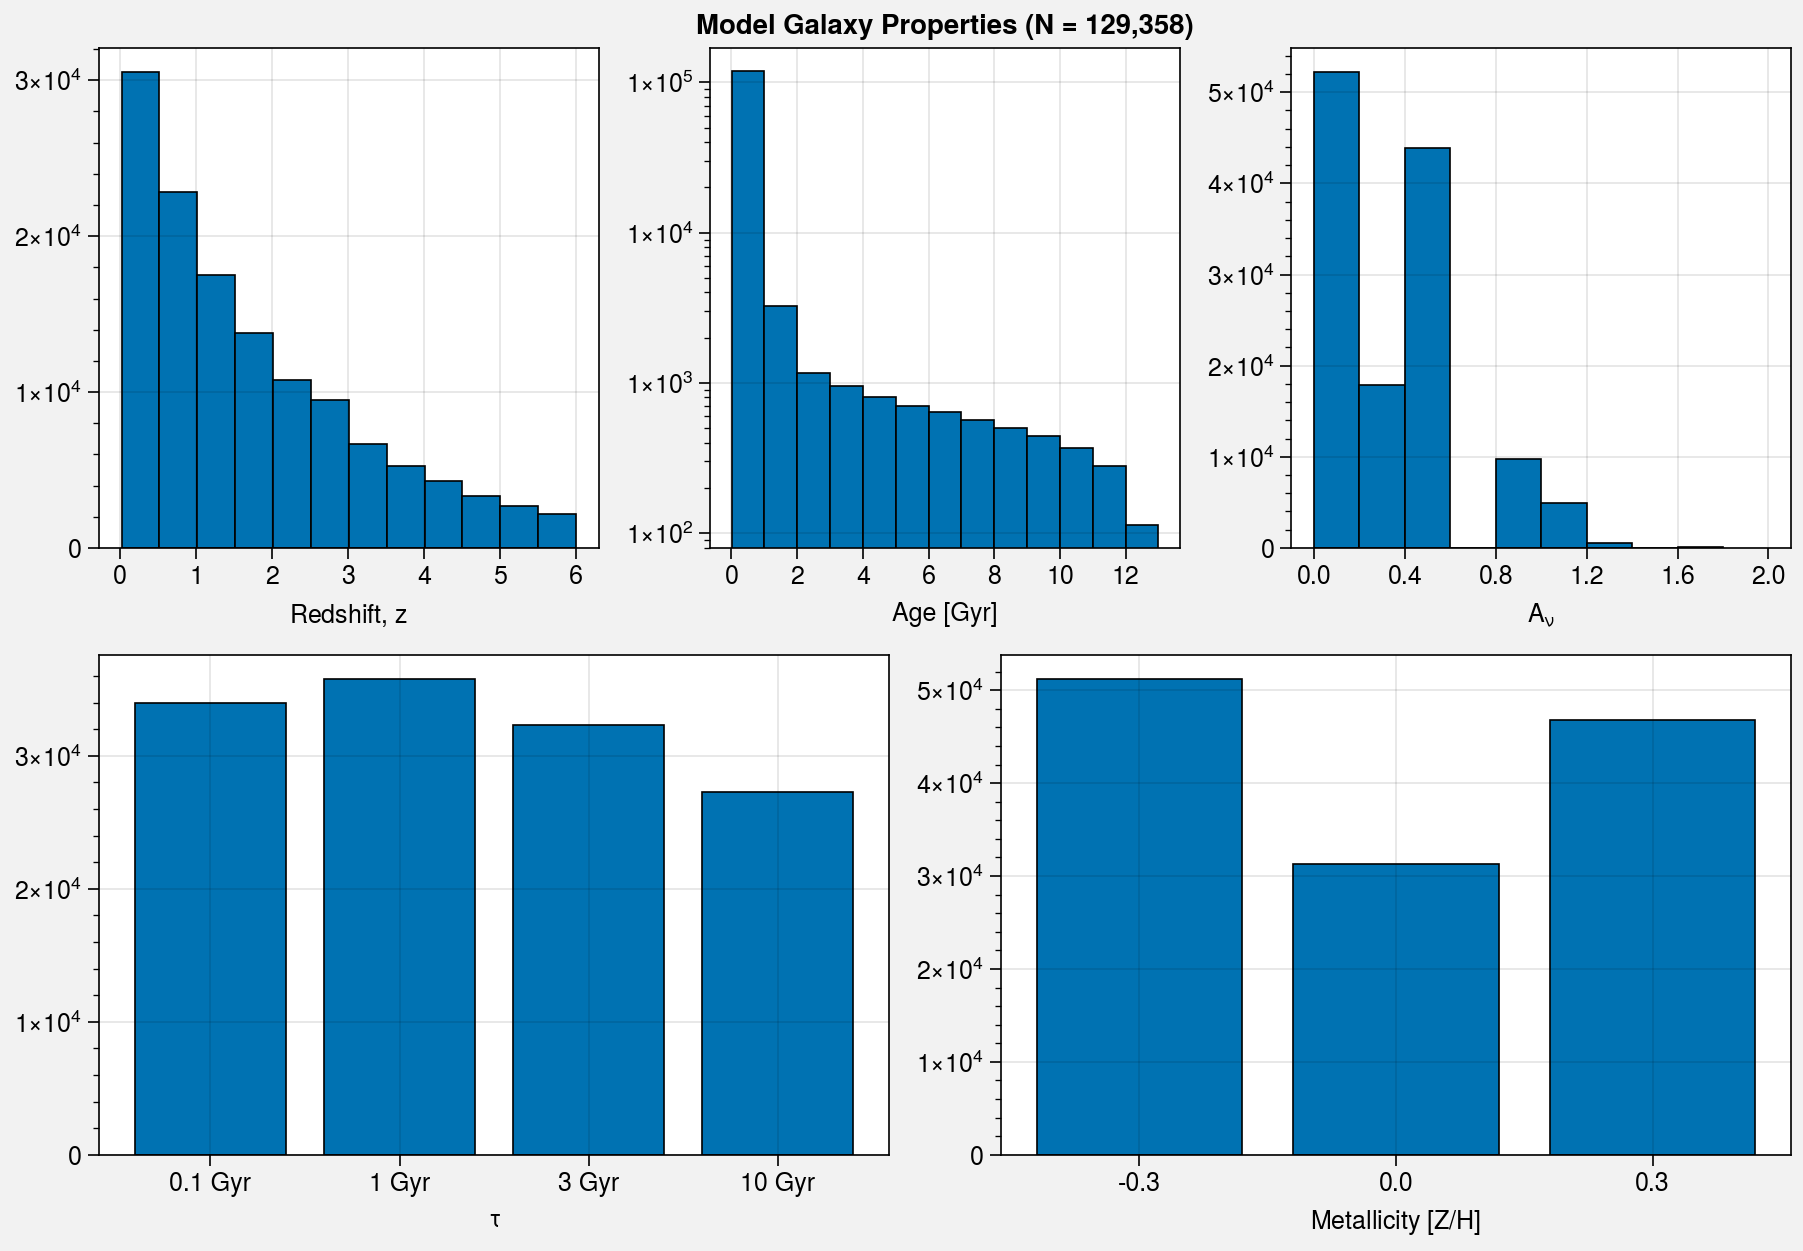

In [ ]:
# Automatic spacing for all margins and between all columns and rows
fig, axs = plot.subplots([[1 , 1, 2, 2, 3, 3],[4, 4, 4, 5, 5, 5]], axwidth=2.5, share=0)

axs[0].hist(observable_df['z'], bins=12)
axs[0].format(xlabel=(r'Redshift, $z$'), xlocator=1, xformatter='scalar', yformatter='sci', ylocator=10e3)

axs[1].hist(observable_df['t/Gyr'], bins=13)
axs[1].format(xlabel=r'Age [Gyr]', xlocator=2, xformatter='scalar', yscale='log', yformatter='sci')

axs[2].hist(observable_df['Av'], bins=9)
axs[2].format(xlabel=(r'$A_{\nu}$'), xlocator=.4, xformatter='scalar', yformatter='sci', xlim=(-0.1, 2.1))

axs[3].bar(tau_names, tau_counts)
axs[3].format(xlabel=r'$\tau$', yformatter='sci', ylocator=10e3)

axs[4].bar(Z_names, Z_counts)
axs[4].format(xlabel=r'Metallicity $[Z/H]$', yformatter='sci', ylocator=10e3)

axs.format(suptitle='Model Galaxy Properties (N = 129,358)')

#plt.savefig('properties.png', format='png', dpi=250, facecolor='w')

### Make catalogues for each of the 4 filter setups.

In [ ]:
sample_df = phot_errors_df.sample(5000, random_state=45).copy()

In [ ]:
sample_df.to_csv('euc_obs_n5000.csv')

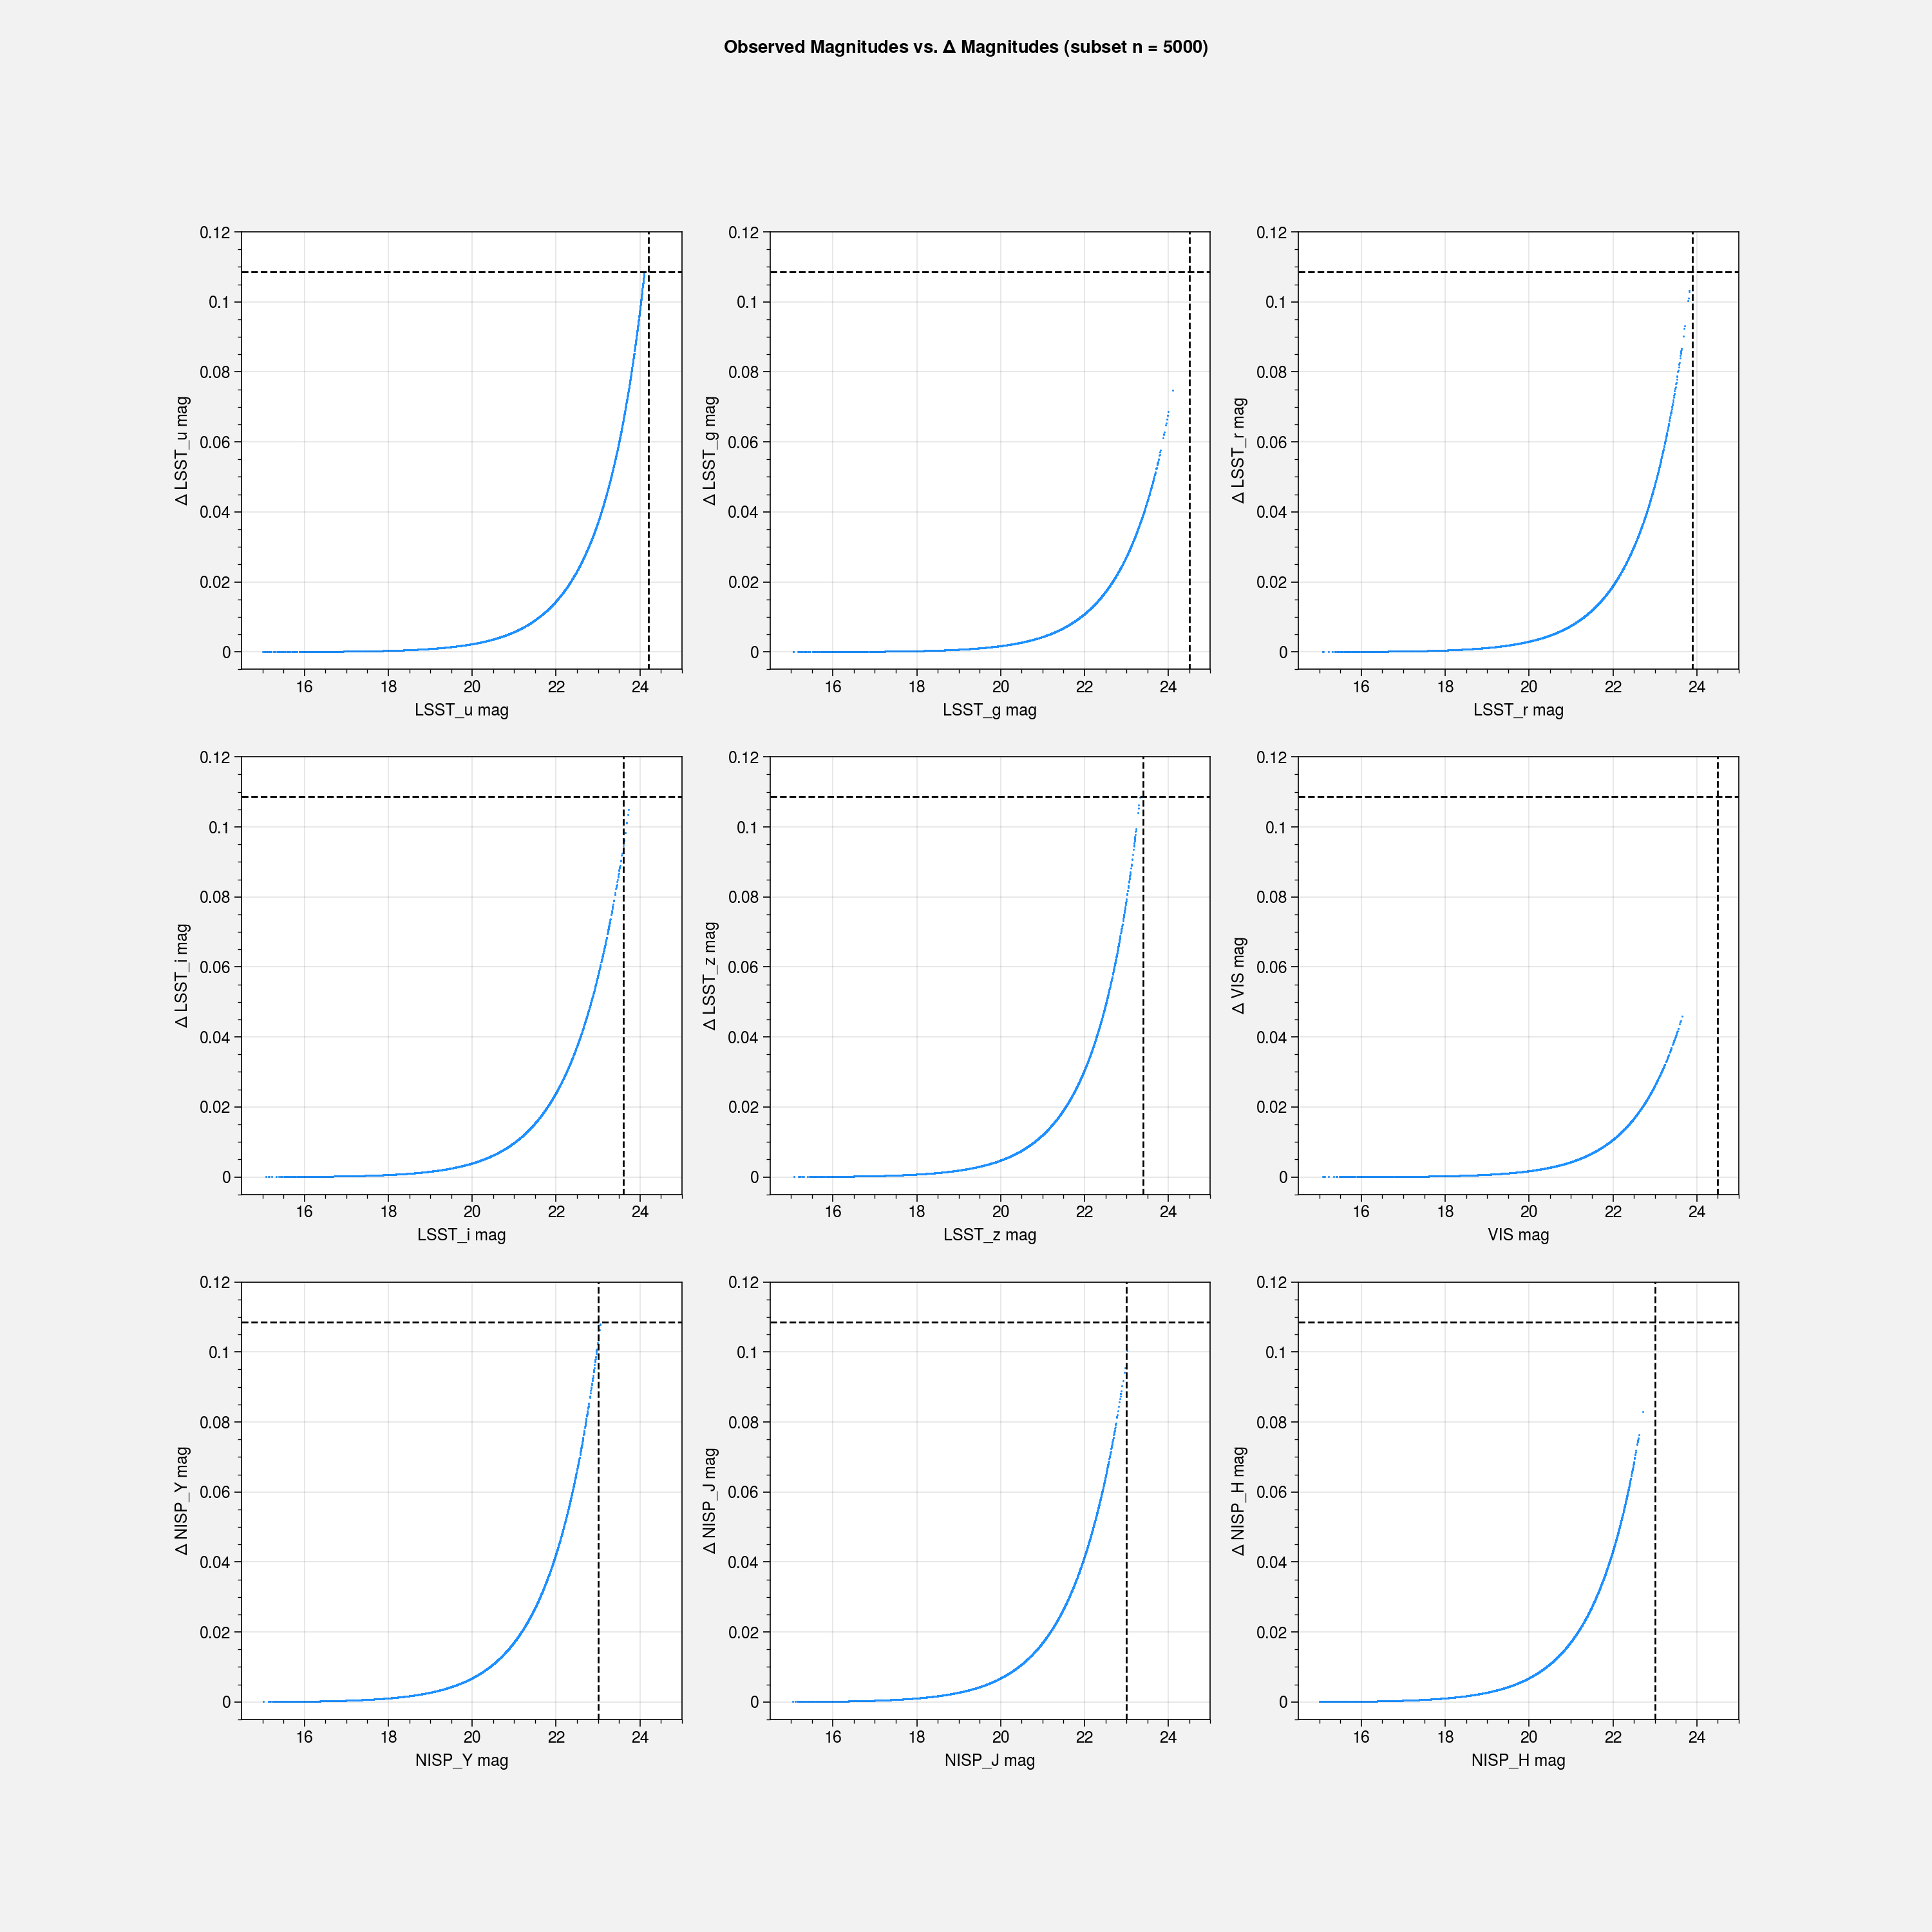

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Observed Magnitudes vs. $\Delta$ Magnitudes (subset n = 5000)')
plt.subplot(331)
plt.scatter(sample_df['LSST_u'], sample_df['delta_LSST_u'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_u'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_u mag')
plt.ylabel(r'$\Delta$ LSST_u mag')

plt.subplot(332)
plt.scatter(sample_df['LSST_g'], sample_df['delta_LSST_g'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_g'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_g mag')
plt.ylabel(r'$\Delta$ LSST_g mag')

plt.subplot(333)
plt.scatter(sample_df['LSST_r'], sample_df['delta_LSST_r'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_r'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_r mag')
plt.ylabel(r'$\Delta$ LSST_r mag')

plt.subplot(334)
plt.scatter(sample_df['LSST_i'], sample_df['delta_LSST_i'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_i'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_i mag')
plt.ylabel(r'$\Delta$ LSST_i mag')

plt.subplot(335)
plt.scatter(sample_df['LSST_z'], sample_df['delta_LSST_z'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_z'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_z mag')
plt.ylabel(r'$\Delta$ LSST_z mag')

plt.subplot(336)
plt.scatter(sample_df['VIS'], sample_df['delta_VIS'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['VIS'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('VIS mag')
plt.ylabel(r'$\Delta$ VIS mag')

plt.subplot(337)
plt.scatter(sample_df['NISP_Y'], sample_df['delta_NISP_Y'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_Y'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_Y mag')
plt.ylabel(r'$\Delta$ NISP_Y mag')

plt.subplot(338)
plt.scatter(sample_df['NISP_J'], sample_df['delta_NISP_J'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_J'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_J mag')
plt.ylabel(r'$\Delta$ NISP_J mag')

plt.subplot(339)
plt.scatter(sample_df['NISP_H'], sample_df['delta_NISP_H'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_H'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_H mag')
plt.ylabel(r'$\Delta$ NISP_H mag')

#plt.savefig('sample_phot_errs_revised.png', format='png', dpi=250, facecolor='w')

In [ ]:
sample_tau = sample_df['tau/Gyr'].value_counts()

In [ ]:
sample_taus = {'0.1 Gyr':sample_tau[0.1],
        '1 Gyr':sample_tau[1],
        '3 Gyr':sample_tau[3],
        '10 Gyr':sample_tau[10]}

In [ ]:
sample_tau_names=list(sample_taus.keys())
sample_tau_counts=list(sample_taus.values())

In [ ]:
sample_zeds = sample_df['Z'].value_counts()


In [ ]:
sample_Z_dict = {'-0.3' : sample_zeds[-0.3],
          '0.0' : sample_zeds[0.0],
          '0.3' : sample_zeds[0.3]}

In [ ]:
sample_Z_names = list(sample_Z_dict.keys())
sample_Z_counts = list(sample_Z_dict.values())

/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class w

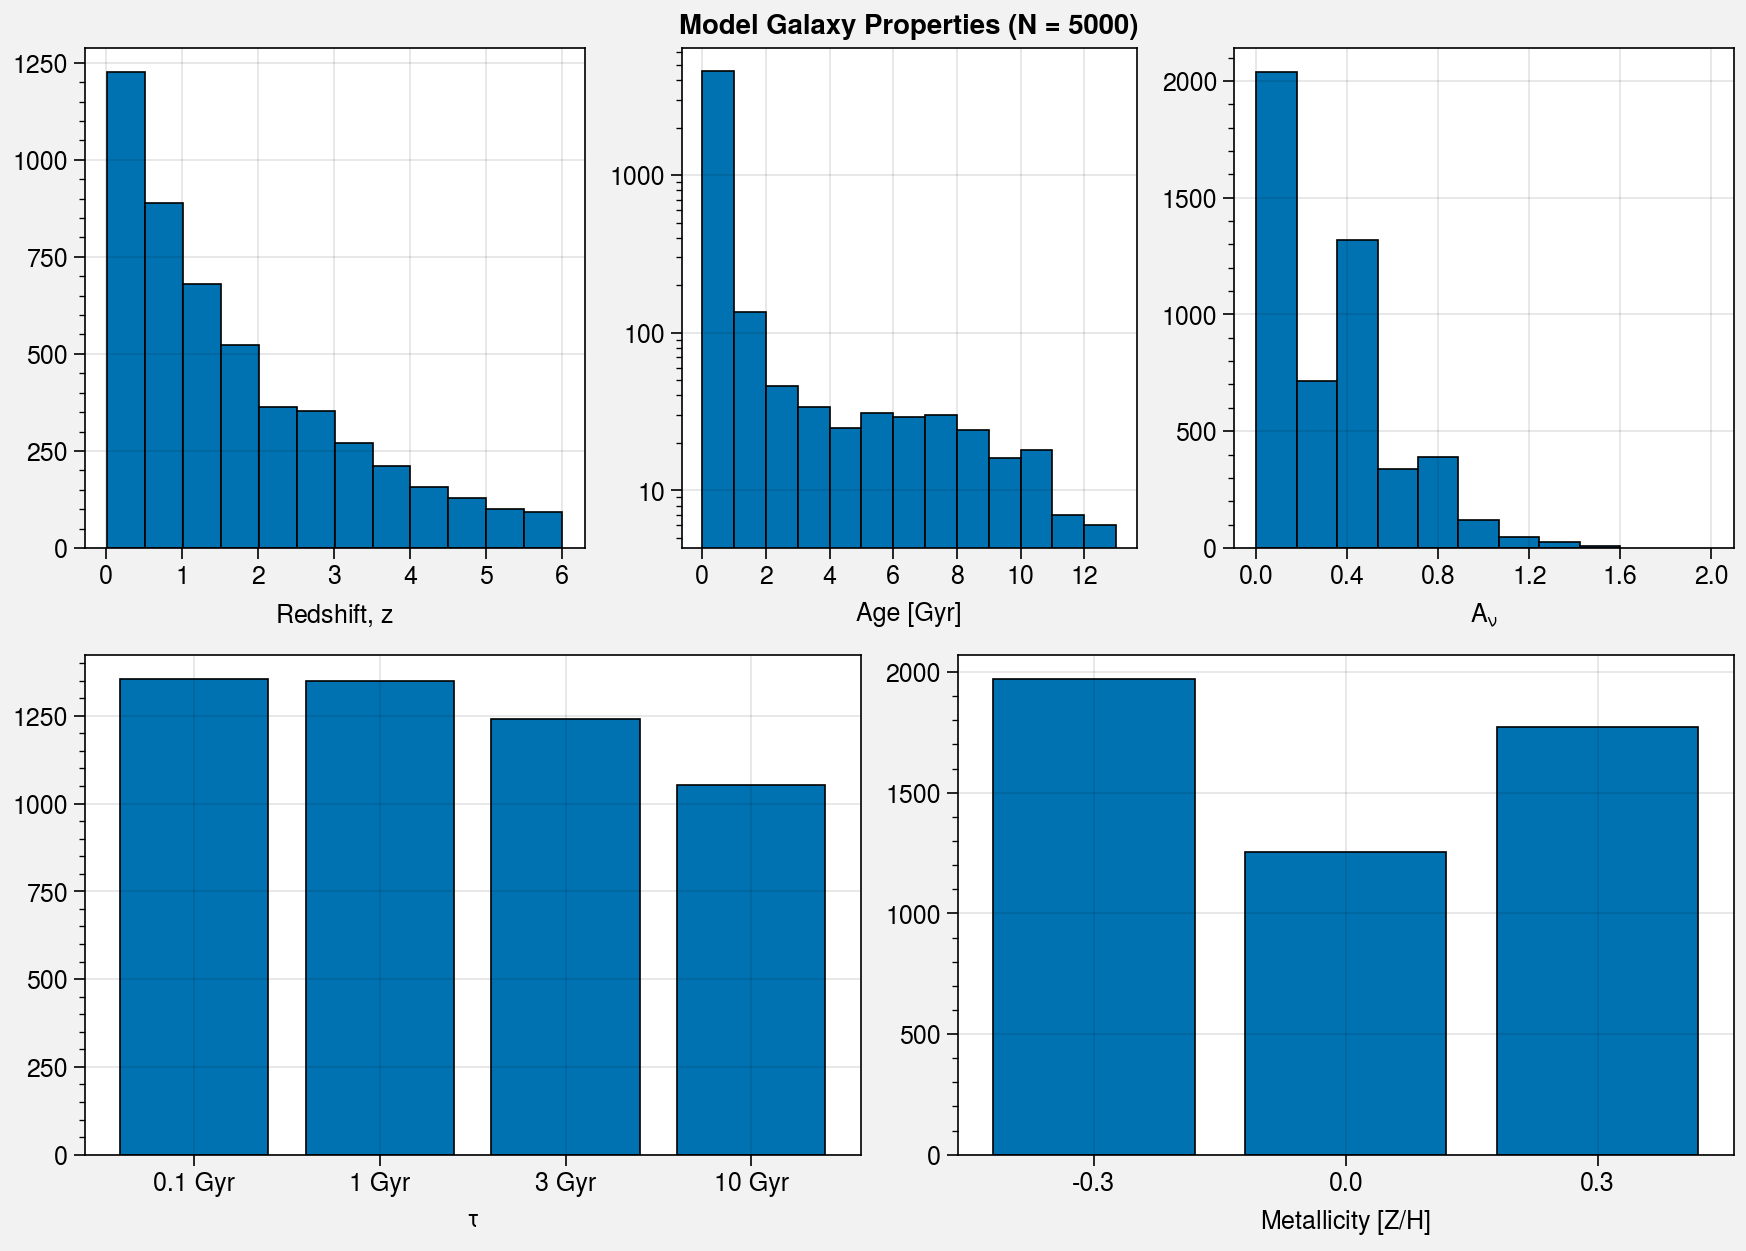

In [ ]:
# Automatic spacing for all margins and between all columns and rows
fig, axs = plot.subplots([[1 , 1, 2, 2, 3, 3],[4, 4, 4, 5, 5, 5]], axwidth=2.5, share=0)

axs[0].hist(sample_df['z'], bins=12)
axs[0].format(xlabel=(r'Redshift, $z$'), xlocator=1, xformatter='scalar', yformatter='scalar', ylocator=250)

axs[1].hist(sample_df['t/Gyr'], bins=13)
axs[1].format(xlabel=r'Age [Gyr]', xlocator=2, xformatter='scalar', yscale='log', yformatter='scalar')

axs[2].hist(sample_df['Av'], bins=9)
axs[2].format(xlabel=(r'$A_{\nu}$'), xlocator=.4, xformatter='scalar', yformatter='scalar', xlim=(-0.1, 2.1), ylocator=500)

axs[3].bar(sample_tau_names, sample_tau_counts)
axs[3].format(xlabel=r'$\tau$', yformatter='scalar', ylocator=250)

axs[4].bar(sample_Z_names, sample_Z_counts)
axs[4].format(xlabel=r'Metallicity $[Z/H]$', yformatter='scalar', ylocator=500)

axs.format(suptitle='Model Galaxy Properties (N = 5000)')

#plt.savefig('sample_properties.png', format='png', dpi=250, facecolor='w')

In [ ]:
sample_df.columns

Index(['For_key_ID', 'LSST_u', 'LSST_g', 'LSST_r', 'LSST_i', 'LSST_z', 'VIS',
       'NISP_Y', 'NISP_J', 'NISP_H', 'z', 't/Gyr', 'M*', 'M_initial', 'Z',
       'SFH', 'tau/Gyr', 'Av_law', 'Av', 't_l', 'physical', 'delta_LSST_u',
       'delta_LSST_g', 'delta_LSST_r', 'delta_LSST_i', 'delta_LSST_z',
       'delta_VIS', 'delta_NISP_Y', 'delta_NISP_J', 'delta_NISP_H'],
      dtype='object')

In [ ]:
full_filts = sample_df.drop(columns=['For_key_ID', 'z', 't/Gyr', 'M*', 'M_initial', 'Z',
       'SFH', 'tau/Gyr', 'Av_law', 'Av', 't_l', 'physical'])

In [ ]:
full_filts['z'] = sample_df['z']

In [ ]:
full_filts.insert(loc=0, column='ID', value=np.arange(1, len(full_filts)+1))

In [ ]:
full_filts

,ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,delta_LSST_u,delta_LSST_g,delta_LSST_r,delta_LSST_i,delta_LSST_z,delta_VIS,delta_NISP_Y,delta_NISP_J,delta_NISP_H,z
243028,1,20.244440,18.886510,18.101565,17.601337,17.231903,17.754681,16.725266,16.342438,15.969696,0.002848,0.000617,0.000520,0.000433,0.000370,0.000217,0.000336,0.000236,0.000167,0.09
272429,2,22.922050,22.920297,22.505370,21.608455,21.387868,21.934957,21.269565,21.125713,20.883410,0.034454,0.025333,0.030269,0.016944,0.017233,0.010060,0.021838,0.018979,0.015461,0.81
119174,3,19.638878,19.435416,18.876824,18.746329,18.656397,18.802099,18.482038,18.057554,17.808377,0.001629,0.001023,0.001063,0.001240,0.001376,0.000570,0.001691,0.001144,0.000910,0.41
48529,4,23.488363,22.561686,21.168420,21.046725,21.121668,21.130198,21.104136,21.204350,21.406068,0.059249,0.018209,0.008790,0.010194,0.013449,0.004835,0.018778,0.020378,0.025027,4.69
267381,5,22.465750,21.333292,20.499270,20.591670,20.732313,20.568976,20.829657,21.051244,21.337007,0.022404,0.005875,0.004742,0.006736,0.009368,0.002893,0.014611,0.017742,0.023484,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150350,4996,21.952710,21.777439,21.042969,20.805630,20.593813,20.898973,20.284398,19.831802,19.531988,0.013866,0.008844,0.007829,0.008187,0.008239,0.003913,0.008866,0.005836,0.004452,0.46
82351,4997,20.020536,20.057328,19.968546,19.634139,19.601464,19.791383,19.528194,19.414522,19.243114,0.002316,0.001814,0.002907,0.002804,0.003291,0.001417,0.004427,0.003980,0.003412,0.73
224947,4998,19.141538,18.642908,18.250145,18.126033,18.029581,18.173260,17.869777,17.733056,17.596281,0.001030,0.000493,0.000597,0.000701,0.000772,0.000320,0.000963,0.000848,0.000749,0.22
191274,4999,21.007024,21.142577,21.117026,20.717185,20.699338,20.906722,20.661016,20.502824,20.181196,0.005763,0.004929,0.008383,0.007553,0.009086,0.003941,0.012521,0.010777,0.008096,0.75


In [ ]:
np.savetxt(r'all_5000.cat', full_filts.values, fmt=' '.join(['%i'] + ['%1.4f']*19))

In [ ]:
no_u_cat = full_filts.drop(columns=['LSST_u', 'delta_LSST_u'])

In [ ]:
np.savetxt(r'no_u_5000.cat', no_u_cat.values, fmt=' '.join(['%i'] + ['%1.4f']*17))

In [ ]:
gnd_cat = full_filts.drop(columns=['VIS',
       'NISP_Y', 'NISP_J', 'NISP_H','delta_VIS', 'delta_NISP_Y', 'delta_NISP_J', 'delta_NISP_H'])

In [ ]:
np.savetxt(r'gnd_5000.cat', gnd_cat.values, fmt=' '.join(['%i'] + ['%1.4f']*11))

In [ ]:
euc_cat = full_filts.drop(columns=['LSST_u', 'LSST_g', 'LSST_r', 'LSST_i', 'LSST_z', 'delta_LSST_u',
       'delta_LSST_g', 'delta_LSST_r', 'delta_LSST_i', 'delta_LSST_z'])

In [ ]:
np.savetxt(r'euc_5000.cat', euc_cat.values, fmt=' '.join(['%i'] + ['%1.4f']*9))